### Species accumulation through time

In [6]:
import pandas as pd
df = pd.read_csv('../data/type_localities_Bolivian_fishes.txt', sep='\t', encoding='latin-1')
print(df)

      nr.  year                 original_name  \
0     NaN  1846              Ovestias cuvieri   
1    30.0  1846            Orestias humboldti   
2    27.0  1846                Orestias albus   
3    37.0  1846               Orestias luteus   
4    40.0  1846           Orestias pentlandii   
..    ...   ...                           ...   
205  56.0  2022         Moema juanderibaensis   
206  11.0  2023            Bujurquina mabelae   
207  10.0  2023          Bujurquina beniensis   
208  53.0  2023           Moema beltramonorum   
209  84.0  2023  Bryconamericus parapetiensis   

                                        author name_category  \
0                            Valenciennes 1846         valid   
1                            Valenciennes 1846       synonym   
2                            Valenciennes 1846         valid   
3                            Valenciennes 1846         valid   
4                            Valenciennes 1846         valid   
..                         

[7, 1, 5, 1, 3, 1, 1, 1, 6, 6, 1, 6, 1, 3, 4, 5, 1, 1, 28, 1, 2, 3, 16, 1, 4, 6, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 4, 3, 3, 3, 2, 1, 1, 2, 1, 2, 1, 3, 6, 2, 7, 1, 3, 3, 2, 1, 2, 3, 4, 3, 2, 4, 4, 2, 1, 1, 4]
[7, 8, 13, 14, 17, 18, 19, 20, 26, 32, 33, 39, 40, 43, 47, 52, 53, 54, 82, 83, 85, 88, 104, 105, 109, 115, 116, 117, 118, 119, 121, 122, 124, 125, 128, 129, 133, 136, 139, 142, 144, 145, 146, 148, 149, 151, 152, 155, 161, 163, 170, 171, 174, 177, 179, 180, 182, 185, 189, 192, 194, 198, 202, 204, 205, 206, 210]
[1923, 1924, 1925, 1927, 1929, 1940, 1942, 1943, 1944, 1966, 1968, 1969, 1972, 1973, 1846, 1975, 1976, 1978, 1981, 1854, 1855, 1982, 1983, 1858, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1996, 1997, 1999, 2001, 2002, 2003, 1876, 2004, 1878, 2005, 2006, 2007, 2008, 2009, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 1892, 2020, 2022, 2023, 1896, 1897, 1904, 1907, 1911, 1912, 1915, 1916, 1917, 1918]


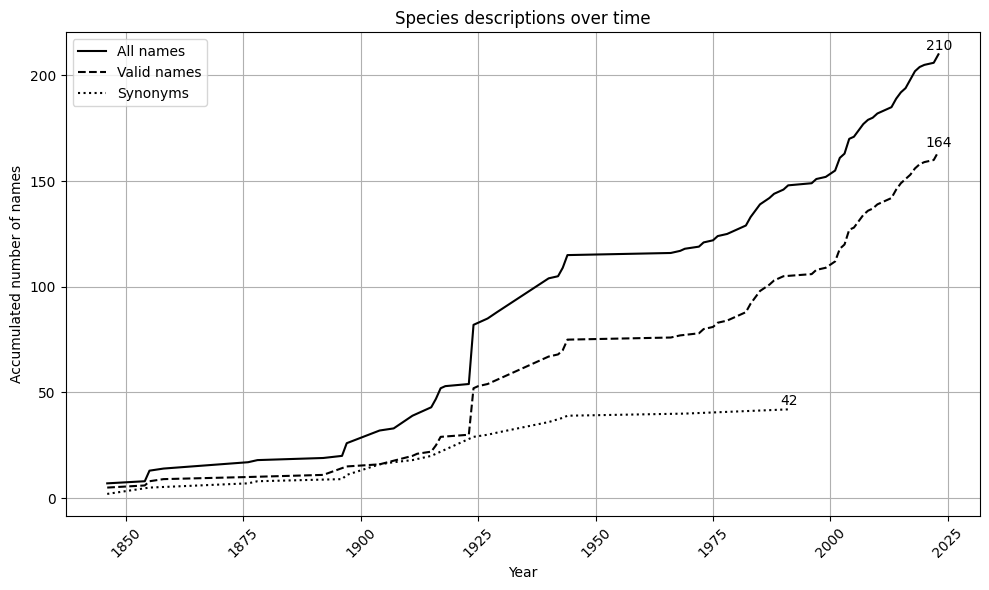

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/type_localities_Bolivian_fishes.txt', sep='\t', encoding='latin-1')

def count_occurrences(array):
  """Counts the occurrences of each number in an array and returns them as a list.

  Args:
      array: A list of elements.

  Returns:
      A list where the indices represent the unique elements and the values represent their counts.
  """
  counts = {}
  for num in array:
    if num in counts:
      counts[num] += 1
    else:
      counts[num] = 1
  return list(counts.values())  # Convert dictionary values to a list

# Example usage
array = df['year']
counts = count_occurrences(array)

print(counts)
# Calculate year-wise accumulation (optional, since data already has accumulated count)
cumulative_sum = []
total = 0

for num in counts:
  total += num
  cumulative_sum.append(total)

print(cumulative_sum)  # Output: [1, 3, 5, 8, 12, 16, 21]
print(list(set(df['year'])))
# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(sorted(list(set(df['year']))), cumulative_sum, label='All names', color='black')

x_data = sorted(list(set(df['year'])))
last_x = x_data[-1]
last_y = cumulative_sum[-1]
text_x = last_x + 0.1
text_y = last_y + 2
latest_number_text = plt.text(text_x, text_y, str(cumulative_sum[-1]),
                              ha='center', va='baseline', fontsize=10)

# Add line with valid names
filtered_df = df[df['name_category'] == 'valid']
array = filtered_df['year']
counts = count_occurrences(array)

cumulative_sum = []
total = 0

for num in counts:
  total += num
  cumulative_sum.append(total)
    
plt.plot(sorted(list(set(filtered_df['year']))), cumulative_sum, label='Valid names', color='black', linestyle='--')

x_data = sorted(list(set(filtered_df['year'])))
last_x = x_data[-1]
last_y = cumulative_sum[-1]
text_x = last_x + 0.1
text_y = last_y + 2
latest_number_text = plt.text(text_x, text_y, str(cumulative_sum[-1]),
                              ha='center', va='baseline', fontsize=10)

# Add line with synonyms
filtered_df = df[df['name_category'] == 'synonym']
array = filtered_df['year']
counts = count_occurrences(array)

cumulative_sum = []
total = 0

for num in counts:
  total += num
  cumulative_sum.append(total)

plt.plot(sorted(list(set(filtered_df['year']))), cumulative_sum, label='Synonyms', color='black', linestyle=':')
x_data = sorted(list(set(filtered_df['year'])))
last_x = x_data[-1]
last_y = cumulative_sum[-1]
text_x = last_x + 0.1
text_y = last_y + 2
latest_number_text = plt.text(text_x, text_y, str(cumulative_sum[-1]),
                              ha='center', va='baseline', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Accumulated number of names')
plt.title('Species descriptions over time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()